In [52]:
import cotengra as ctg
import numpy as np
import torch

In [53]:
if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [54]:
#  einsum like interface

x = torch.randn(2, 3)
y = torch.randn(3, 4)

# einsum style
z = ctg.einsum("ab,bc->ca", x, y)

print(z)

# programmatic style
z = ctg.array_contract(
  arrays=(x, y), 
  inputs=[(0, 1), (1, 2)], 
  output=(2, 0),
)

print(z)

tensor([[ 1.9928, -1.1813],
        [-1.8613,  1.5364],
        [-0.5960,  0.9922],
        [ 1.4305, -2.4903]])
tensor([[ 1.9928, -1.1813],
        [-1.8613,  1.5364],
        [-0.5960,  0.9922],
        [ 1.4305, -2.4903]])


In [55]:
## a little bit complex example

def get_shape(A):
    return A.shape

#### involved function os cotengra 

#### 1. ctg.utils.eq_to_inputs_output
#### 2. ctg.utils.make_arrays_from_inputs

eq = "PQ,iP,aP,jQ,bQ,RS,aR,cR,bS,dS,TU,iT,cT,jU,dU,iV,jV,aV,bV,iW,jW,cW,dW->"

inputs, output = ctg.utils.eq_to_inputs_output(eq)

print(inputs)

size_dict = {'P': 4, 'Q': 4, 'i': 4, 'a': 4, 'j': 4, 'b': 4, 'R': 4, 'S': 4, 'c': 4, 'd': 4, 'T': 4, 'U': 4, 'V': 4, 'W': 4}

arrays = ctg.utils.make_arrays_from_inputs(inputs, size_dict, seed=42)

arrays = [torch.from_numpy(x) for x in arrays]

shapes = tuple(map(get_shape, arrays))

#print(arrays)

ctg.einsum(eq, *arrays).item()

(('P', 'Q'), ('i', 'P'), ('a', 'P'), ('j', 'Q'), ('b', 'Q'), ('R', 'S'), ('a', 'R'), ('c', 'R'), ('b', 'S'), ('d', 'S'), ('T', 'U'), ('i', 'T'), ('c', 'T'), ('j', 'U'), ('d', 'U'), ('i', 'V'), ('j', 'V'), ('a', 'V'), ('b', 'V'), ('i', 'W'), ('j', 'W'), ('c', 'W'), ('d', 'W'))


-7.884919123532363e-13

In [56]:
# torch with GPU

arrays = [x.to('cuda') for x in arrays]
ctg.einsum(eq, *arrays)

tensor(-7.8849e-13, device='cuda:0', dtype=torch.float64)

{'flops': 94480, 'write': 15697, 'size': 4096}


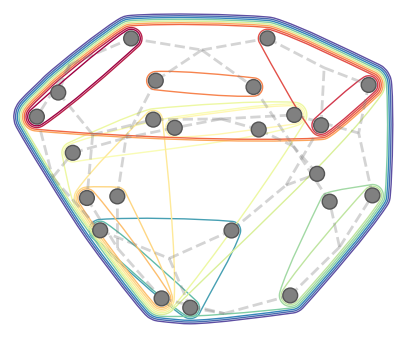

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [57]:
### print out the information 

tree = ctg.einsum_tree(eq, *shapes)

# some typical quantities of interest:
print(tree.contract_stats())

tree.plot_rubberband()

In [58]:
#### generate the functions that can perform the contraction for any input ! 

expr = ctg.einsum_expression(eq, *shapes)   ### for the given shape !!!! ###
expr(*arrays)

arrays = ctg.utils.make_arrays_from_inputs(inputs, size_dict, seed=43)
expr(*arrays)

array(3.98394164e-11)